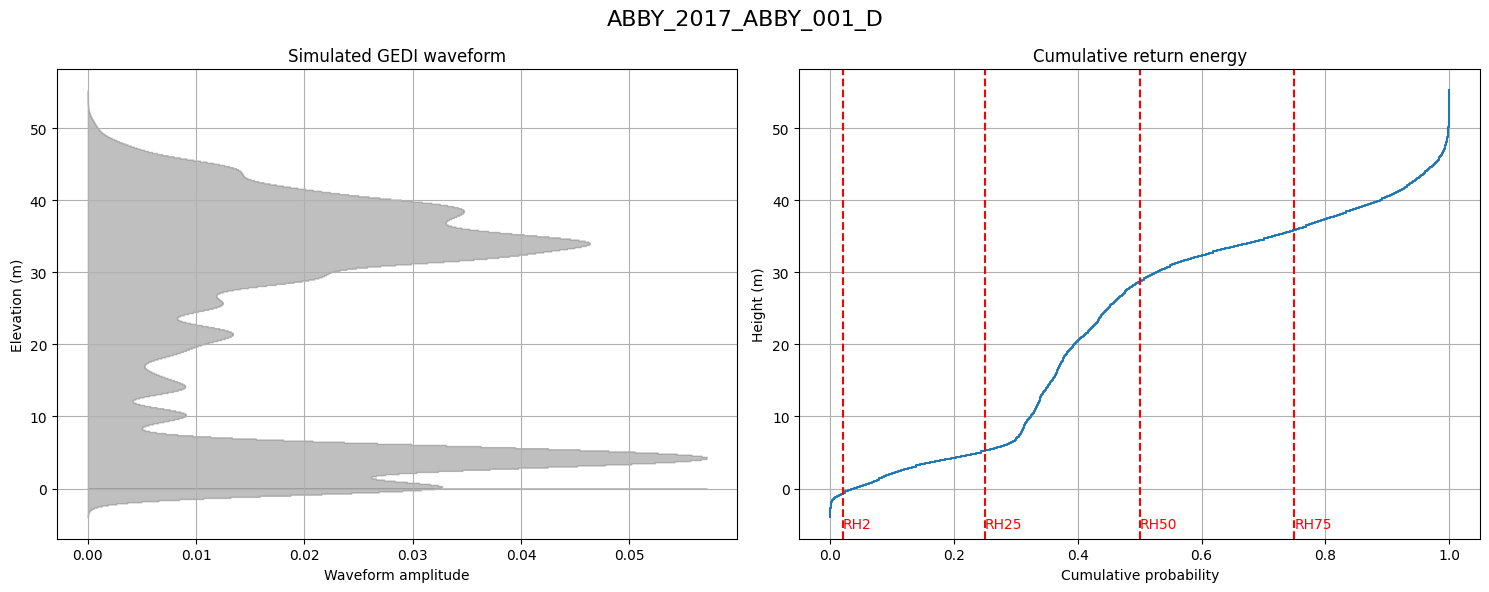

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
csv_file_path = rABBY_2017_ABBY_001_D.csv'
df = pd.read_csv(csv_file_path)

# Sort the DataFrame by Elevation for the cumulative return energy plot
df_sorted_inverted = df.sort_values(by='Elevation', ascending=True)
df_sorted_inverted['Cumulative_Inverted'] = df_sorted_inverted['Rxwaveform'].cumsum()
df_sorted_inverted['Cumulative_Inverted'] = df_sorted_inverted['Cumulative_Inverted'] / df_sorted_inverted['Cumulative_Inverted'].iloc[-1]

# Create a figure with two subplots and an overall title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('ABBY_2017_ABBY_001_D', fontsize=16)

# Plot for Simulated GEDI Waveform
ax1.fill_between(df['Rxwaveform'], df['Elevation'], color="grey", step="pre", alpha=0.5)
ax1.set_title('Simulated GEDI waveform')
ax1.set_xlabel('Waveform amplitude')
ax1.set_ylabel('Elevation (m)')
ax1.grid(True)

# Plot for Cumulative Return Energy with inverted cumulative sum
ax2.plot(df_sorted_inverted['Cumulative_Inverted'], df_sorted_inverted['Elevation'], drawstyle='steps-post')
ax2.set_title('Cumulative return energy')
ax2.set_xlabel('Cumulative probability')
ax2.set_ylabel('Height (m)')
ax2.grid(True)

# Marking RH values on the interchanged Cumulative Return Energy graph with inverted cumulative sum
for quantile in [0.25, 0.50, 0.75, 0.98]:  # Corresponding to RH25, RH50, RH75, RH98
    height = df_sorted_inverted['Elevation'][df_sorted_inverted['Cumulative_Inverted'] <= (1 - quantile)].iloc[0]
    ax2.axvline(x=1 - quantile, color='r', linestyle='--')
    ax2.text(y=height, x=1 - quantile, s=f'RH{int((1 - quantile)*100)}', color='r', ha='left', va='top')

# Adjust the layout of the plots to not overlap with the title
plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Save the combined plot with the overall title as a file
titled_plot_path = r"ABBY_2017_ABBY_001_D.png"
plt.savefig(titled_plot_path)
plt.show()
